In [3]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2024-02-12 22:15:22--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.0, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  91.9MB/s    in 1.1s    

2024-02-12 22:15:26 (91.9 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip

In [ ]:
!ls countries/china

In [10]:
!find ./countries -type f | wc -l

300


In [11]:
!pwd

/content


In [12]:
import tensorflow as tf

In [20]:
import matplotlib.pyplot as plt


In [14]:
img_height, img_width = 32, 32

In [15]:
batch_size = 20

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 66 files belonging to 3 classes.


In [18]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 130 files belonging to 3 classes.


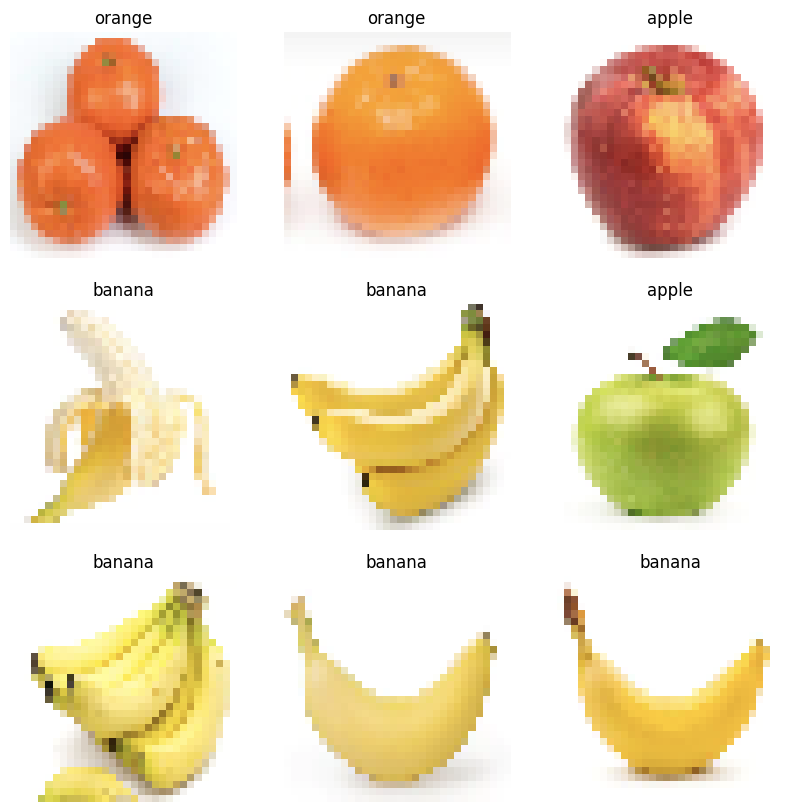

In [21]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
 model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 4s 80ms/step - loss: 1.0062 - accuracy: 0.5261 - val_loss: 0.8000 - val_accuracy: 0.6970
Epoch 2/10
23/23 [==============================] - 2s 73ms/step - loss: 0.6477 - accuracy: 0.7326 - val_loss: 0.5906 - val_accuracy: 0.7424
Epoch 3/10
23/23 [==============================] - 3s 94ms/step - loss: 0.4871 - accuracy: 0.8043 - val_loss: 0.5396 - val_accuracy: 0.7727
Epoch 4/10
23/23 [==============================] - 3s 76ms/step - loss: 0.3343 - accuracy: 0.8761 - val_loss: 0.3594 - val_accuracy: 0.8788
Epoch 5/10
23/23 [==============================] - 2s 74ms/step - loss: 0.2345 - accuracy: 0.9304 - val_loss: 0.3211 - val_accuracy: 0.8636
Epoch 6/10
23/23 [==============================] - 2s 74ms/step - loss: 0.2208 - accuracy: 0.9283 - val_loss: 0.3707 - val_accuracy: 0.8939
Epoch 7/10
23/23 [==============================] - 3s 94ms/step - loss: 0.1854 - accuracy: 0.9326 - val_loss: 0.4021 - val_accuracy: 0.8485
Epoch 8/10
23

In [24]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 15ms/step - loss: 0.1722 - accuracy: 0.9462


[0.17224565148353577, 0.9461538195610046]

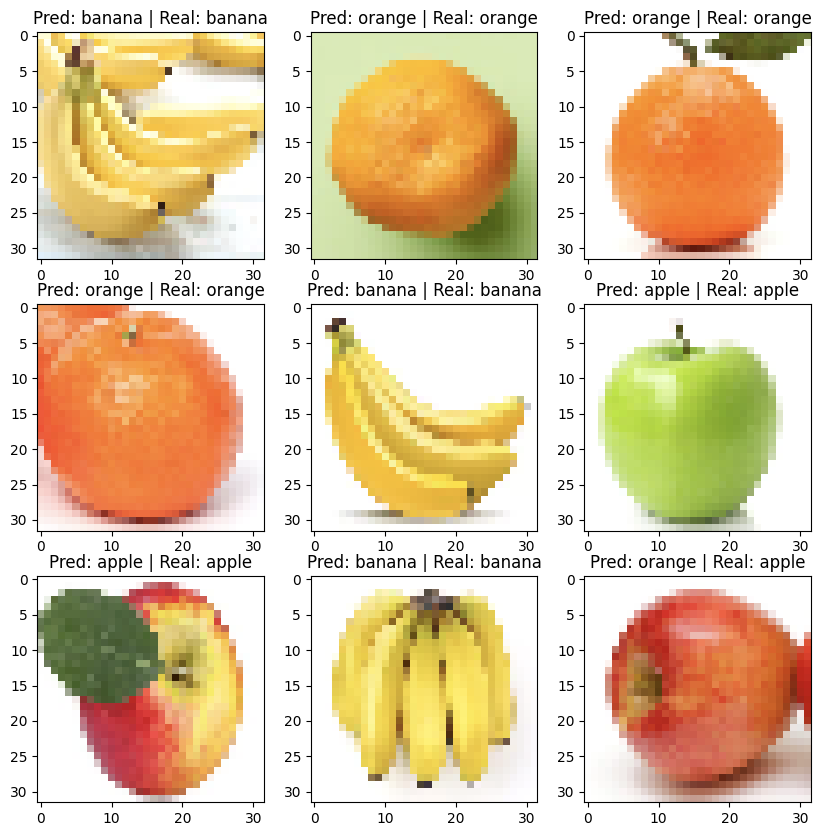

In [25]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [27]:
!ls

fruits	fruits.zip  __MACOSX  model.tflite  sample_data


In [28]:
!pwd

/content
